## EXPLORATION PRELIMINAIRE DU CORPUS

### PARCOURS DES DOCUMENTS 

#### Exploration des documents: répartition selon les journaux, nombres d'exemplaires, dates...

In [54]:
#Imports 
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaulineneguem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Vérification du nombre de document dans le corpus

In [56]:
path = "../data/caf/"
files = sorted(os.listdir(path))
len(files)
#Nous avons un fichier supplémentaire "README.txt" ce qui justifie le nombre total

1001

##### Manipulation du nom des fichiers pour réléver les informations de publication ( date et source)

In [57]:
all_years = [str(year) for year in range(1835, 1969)]

In [58]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        
    else:
        print(f"Anomalous file: {f}")

Anomalous file: .DS_Store


In [59]:
# Classement des articles selon les jouneaux qui les ont publiés 

print(f"Il y a {count_newspapers['JB421']} exemplaires du journal L'Avenir du Luxembourg, {count_newspapers['JB427']} exemplaires de La Libre Belgique, {count_newspapers['JB555']} exemplaires de L'Indépendance belge, {count_newspapers['JB555A']} exemplaires de L'Indépendance belge (édité en Angleterre), {count_newspapers['JB567']} exemplaires du Journal de Bruxelles, {count_newspapers['JB572']} exemplaires du Journal de Charleroi, {count_newspapers['JB638']} exemplaires de La Meuse, {count_newspapers['JB685']} exemplaires du journal Le petit Bleu, {count_newspapers['JB2729']} exemplaires du journal Le Vingtième Siècle, {count_newspapers['JB773']} exemplaire de Vers l'Avenir, {count_newspapers['JB837']} exemplaires du journal Le Peuple, {count_newspapers['JB838']} exemplaire du journal Le Soir et {count_newspapers['JB1051']} exemplaires du journal Le Drapeau Rouge")

Il y a 18 exemplaires du journal L'Avenir du Luxembourg, 36 exemplaires de La Libre Belgique, 179 exemplaires de L'Indépendance belge, 6 exemplaires de L'Indépendance belge (édité en Angleterre), 40 exemplaires du Journal de Bruxelles, 86 exemplaires du Journal de Charleroi, 223 exemplaires de La Meuse, 29 exemplaires du journal Le petit Bleu, 0 exemplaires du journal Le Vingtième Siècle, 24 exemplaire de Vers l'Avenir, 68 exemplaires du journal Le Peuple, 229 exemplaire du journal Le Soir et 8 exemplaires du journal Le Drapeau Rouge


In [60]:
# liste des années sans aucun article sur le sujet 

missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1844, 1851, 1852, 1854, 1878, 1882, 1942, 1944, 1945, 1965, 1967


#### Analyse de la distribution du vocabulaire du corpus 

##### Création de notre liste de stopwords

In [61]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "autre", "jusqu", "déjà", "heures", "très", "puis", 
       "vers", "fit", "trop", "dès", "chambre", "maison", "hui", "dem", "louer", "etc", 
       "peu", "leurs", "ans", "ceux", "rue", "ecr", "voici", "celui", "cctto", "qu'il", "d'un",
       "jour", "francs", "bon", "quelques", "soir", "toute", "saint", "mois", "chez"]
sw = set(sw)

In [62]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

229 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'ans', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'bon', 'c', 'cctto', 'ce', 'cela', 'celle', 'celui', 'ces', 'cet', 'cette', 'ceux', 'chambre', 'chez', 'comme', 'contre', 'd', "d'un", 'dans', 'de', 'dem', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'dès', 'déjà', 'ecr', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'fit', 'francs', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'heures', 'hui', 'il', 'ils', 'j', 'je

##### regroupement de nos fichiers en un nouveau fichier .txt

In [75]:
!cat ../data/caf/*.txt > ../data/allcaf.txt

##### Tokenisation du nouveau fichier

In [76]:
# Récupération du contenu du fichier
path = "../data/allcaf.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [77]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

8155964 words found


In [78]:
# On affiche les 10 premiers mots 
words[:10]

['MBBBÉBSS', 'a', '!', 'i', '■■■■', 'm', "-'", 'i', '-.', "'"]

##### Représentation du vocabulaire 

In [79]:
# Elimination les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2826758 words kept (331154 different word forms)


Récupération des mots les plus fréquents pour en faire un plot

In [80]:
#Mots les plus fréquent
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('bruxelles', 6890),
 ('prix', 5439),
 ('grand', 5322),
 ('femme', 4859),
 ('demande', 4661),
 ('place', 4221),
 ('paris', 3925),
 ('jeune', 3863),
 ('rossel', 3582),
 ('grande', 3532)]

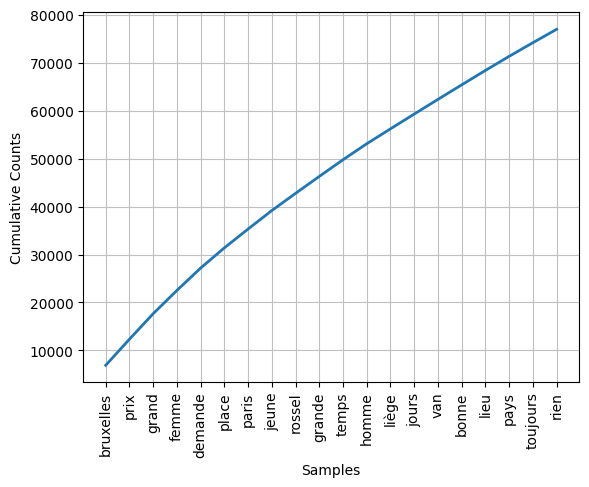

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [81]:
# Plot: les n mots les plus fréquents
n = 20
fdist.plot(n, cumulative=True)

### NETTOYAGE DU CORPUS

#### Filtrage du corpus

##### Imports

In [82]:
#imports 
import sys
import re
from nltk.tokenize import sent_tokenize

##### Répertoire d'inputs et d'outputs

In [83]:
# Le répertoire qui contient vos fichiers txt exportés de Camille
indir = "../data"
# Le répertoire qui contiendra les fichiers txt nettoyés
outdir = "../data/clean"

if not os.path.exists(outdir):
    os.mkdir(outdir)

##### Termes de recherches dans le corpus 

In [84]:
query = ["artiste"]

##### Extraction de phrases contenant le terme de la recherche

In [85]:
# Création d'une regex afin de trouver les mots de la liste query dans le texte
regex = re.compile(f"\\b({'|'.join(query)})\\b", re.IGNORECASE)

In [86]:
for file in os.listdir(indir)[:10]:
    if file.endswith(".txt"):
        relevant_sentences = []
        f_in = open(os.path.join(indir, file), encoding="utf-8")
        text = f_in.read()
        for sentence in sent_tokenize(text):
            if regex.search(sentence):
                relevant_sentences.append(sentence)
        f_in.close()
        f_out = open(os.path.join(outdir, file), "w", encoding="utf-8")
        f_out.write("\n\n".join(relevant_sentences))
        f_out.close()

#### Fonction de Nettoyage

##### Paramètres

In [87]:
# Stockage du contenu du fichier dans une liste
content_list = []
path = "../data/clean/1900.txt"
limit = 10**8
with open(path, 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [88]:
file = content_list

In [89]:
# Impression des 200 premiers caractères du contenu du premier fichier
content_list[0:200]

['■ Ida Rubinstein jooie le rôle, moina en femme douloureuse qu\'en artiste ayant un souci constant de l\'esthétique.\n\nCamille Dela- marre (.artiste peintre), Simone May (femme de lettres), Marguerite Gobât, K. Maycr, Autoi- liètte Dunois, Marguerite Durand,  Plantes médicinales ^ ; ^^_ *££&_£ Recettes et procédés POUR ASSURER LA CONSERVATION .\n\nPodlesnaia, qui incarne la femme fatale est très belle, et comme femme, et comme artiste.\n\nDans l \'e.wraio que nous donnons, Upton Sinclair, lait voir de quelle manière un artiste tel que C\'harl-e Chaplin, est traité par les ■ brass-iiirs d\'affaires.\n\n» Chal\'lut; en artiste sensible, est nt-i-veu»\';- il ne sait pa, i ester tranquille pendant qu\'où projette son Hlin, _es mains s\'agitent iïlinle- îeirtrjrn duit ciHe i î-itiy- j wi r i y r --^- ; » — Qu\'estK\'e que von» en c; j.vi-..?\n\n-artiste.\n\n^*> Telle est la ve d un artiste sous le capital rj li^ nc.\n\n\'iinpoite ouel artiste... M§ÏS , \'.- parole.-, \'les riMs durée "_df

In [90]:
# Ecriture de tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(path, 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [91]:
# Impression du contenu du fichier et constat des "déchets"
with open(path, 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"■ Ida Rubinstein jooie le rôle, moina en femme douloureuse qu'en artiste ayant un souci constant de l'esthétique.\n\nCamille Dela- marre (.artiste peintre), Simone May (femme de lettres), Marguerite Gobât, K. Maycr, Autoi- liètte Dunois, Marguerite Durand,  Plantes médicinales ^ ; ^^_ *££&_£ Recettes et procédés POUR ASSURER LA CONSERVATION .\n\nPodlesnaia, qui incarne la femme fatale est très belle, et comme femme, et comme artiste.\n\nDans l 'e.wraio que nous donnons, Upton Sinclair, lait voir de qu"

##### Application de la fonction de nettoyage

In [92]:
year = 1900

In [93]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

##### Fonction sur le fichier complet 

In [95]:
 
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1900_clean.txt!'

In [96]:
# Vérification du résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'IDA RUBINSTEIN JOOIE RÔLE MOINA FEMME DOULOUREUSE ARTISTE SOUCI CONSTANT ESTHÉTIQUE CAMILLE DELA MARRE ARTISTE PEINTRE SIMONE MAY FEMME LETTRES MARGUERITE GOBÂT MAYCR AUTOI LIÈTTE DUNOIS MARGUERITE DURAND PLANTES MÉDICINALES RECETTES PROCÉDÉS ASSURER CONSERVATION PODLESNAIA INCARNE FEMME FATALE BELLE FEMME ARTISTE WRAIO DONNONS UPTON SINCLAIR LAIT VOIR QUELLE MANIÈRE ARTISTE TEL HARL CHAPLIN TRAITÉ BRASS IIIRS AFFAIRES CHAL LUT ARTISTE SENSIBLE VEU SAIT ESTER TRANQUILLE PROJETTE HLIN MAINS AGITE'

## ANALYSE APPROFONDIE ET ENRICHISSEMENT

### Extraction de mots clés 

##### Imports

In [116]:
import yake

##### Extraction 

In [125]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
kw_extractor

In [171]:
# Lister les Fichiers
data_path = "../data/clean"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [172]:
this_file = files[0]
this_file

'1900.txt'

In [173]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"■ Ida Rubinstein jooie le rôle, moina en femme douloureuse qu'en artiste ayant un souci constant de l'esthétique.\n\nCamille Dela- marre (.artiste peintre), Simone May (femme de lettres), Marguerite Gobât, K. Maycr, Autoi- liètte Dunois, Marguerite Durand,  Plantes médicinales ^ ; ^^_ *££&_£ Recettes et procédés POUR ASSURER LA CONSERVATION .\n\nPodlesnaia, qui incarne la femme fatale est très belle, et comme femme, et comme artiste.\n\nDans l 'e.wraio que nous donnons, Upton Sinclair, lait voir de qu"

In [174]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[("femme d'un artiste", 7.784618554785209e-06),
 ('femme artiste', 1.4902918155942454e-05),
 ('artiste', 2.0160730625965632e-05),
 ("d'une femme artiste", 3.101233162821727e-05),
 ('femme', 4.566545210268855e-05),
 ('jeune artiste', 8.761273344482263e-05),
 ('artiste femme', 8.858956903810237e-05),
 ('artiste peintre', 9.229394615835761e-05),
 ("d'un artiste", 9.62996238831671e-05),
 ('jeune femme', 9.805073057224135e-05),
 ('jeune femme artiste', 0.00010582588283643202),
 ('ARTISTE PEINTRE FEMME', 0.00010829628759576444),
 ('grand artiste', 0.00011414361877846362),
 ("femme d'un", 0.00017127363712333022),
 ("d'un grand artiste", 0.00021454804938389038),
 ("d'une femme", 0.00024990114314278264),
 ('artiste peintre dem', 0.0002562023503192437),
 ('FEMME ARTISTE PEINTRE', 0.00032488886278729333),
 ("qu'une artiste femme", 0.00033422558403053325),
 ('ARTISTE cherche Femme', 0.0003433090802976935)]

In [175]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['femme artiste',
 'jeune artiste',
 'artiste femme',
 'artiste peintre',
 "d'un artiste",
 'jeune femme',
 'grand artiste',
 "femme d'un",
 "d'une femme"]

### Création du nuage de mots 

##### imports

In [127]:
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image

##### Nuage de mots

In [196]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('ARTISTE', 2275), ('FEMME', 1018), ('JEUNE', 184), ('PEINTRE', 146), ('GRAND', 131), ('GRANDE', 130), ('MME', 110), ('VIE', 94), ('TALENT', 92), ('HOMME', 80)]


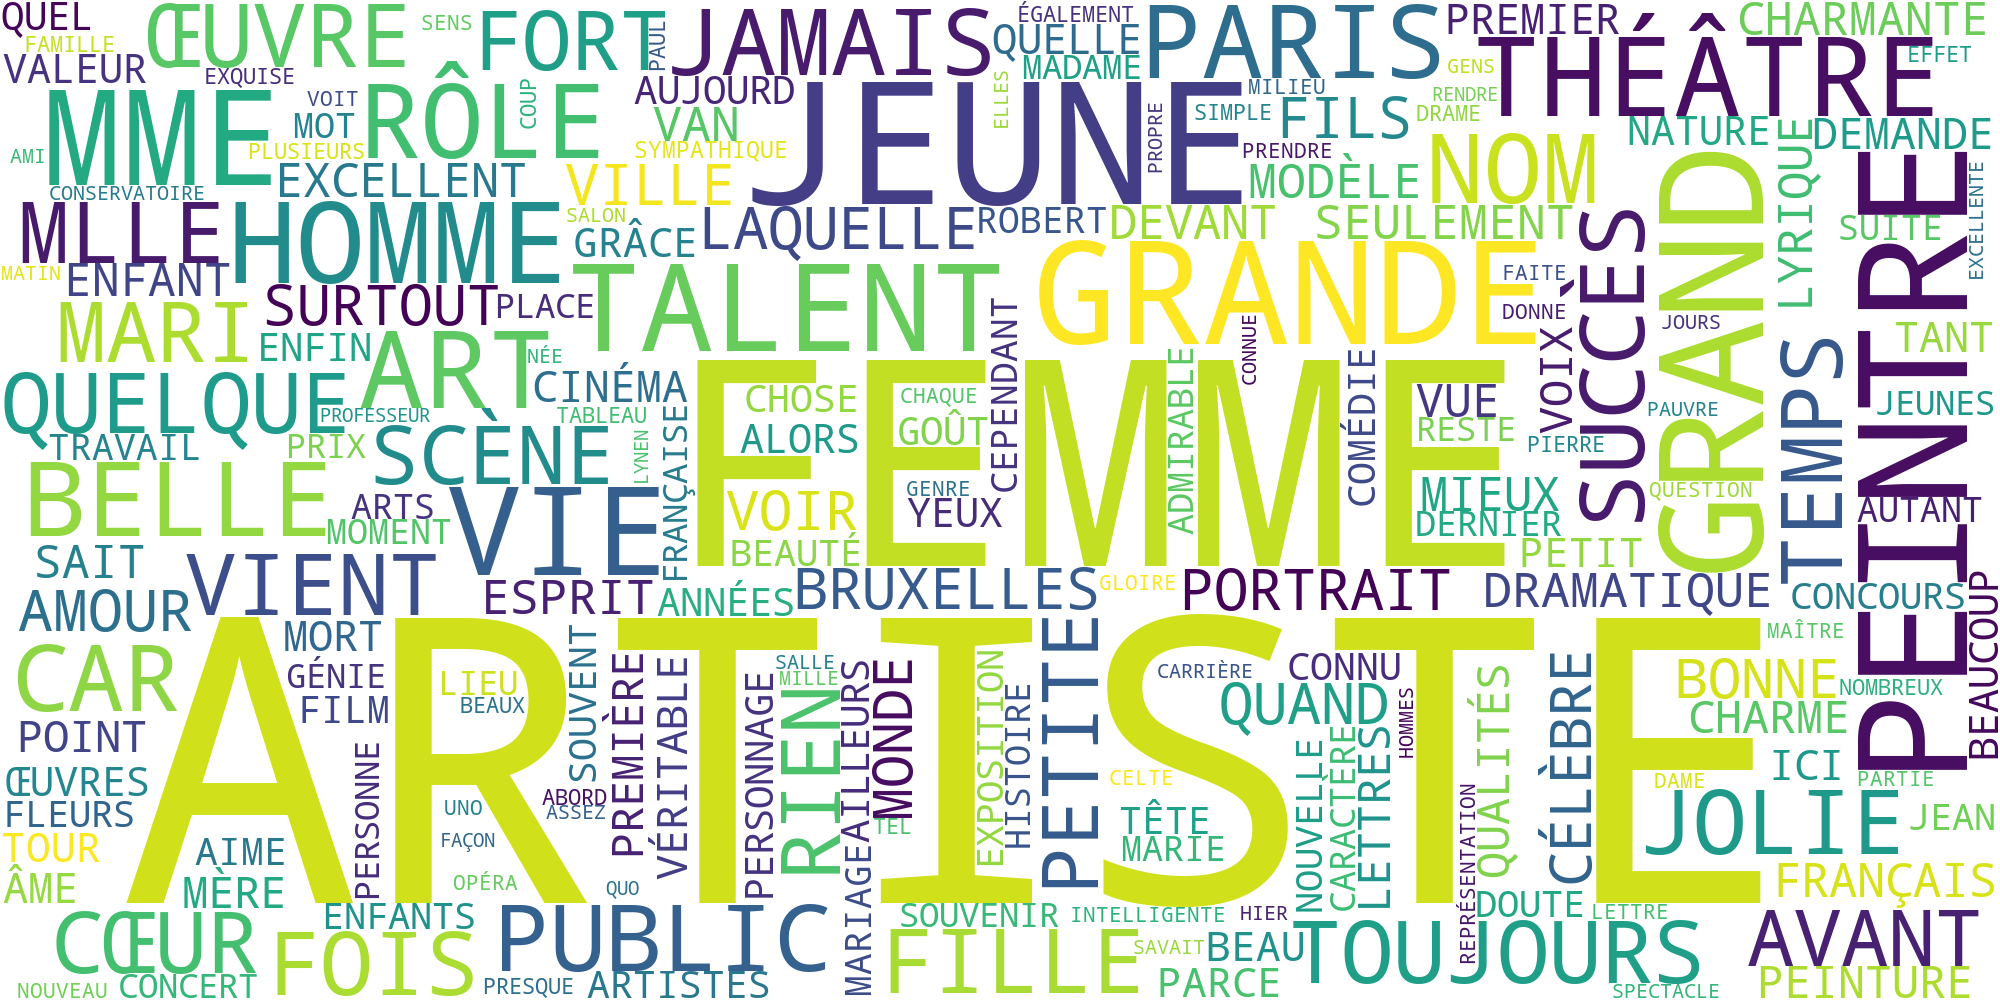

In [197]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

### Reconnaissance et extraction d'entités nommées 

##### imports

In [130]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [131]:
nlp = spacy.load('fr_core_news_md')

In [143]:
# Charger le texte
n=100000
text = open("../data/clean/1900.txt", encoding='utf-8').read()[:n]

In [144]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 6.58 s, sys: 644 ms, total: 7.22 s
Wall time: 8.28 s


#### Entités personnes 

In [145]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [146]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=False)

for person, freq in sorted_people[:100]:
    print(f"{person} apparait {freq} fois dans le corpus")

moina apparait 1 fois dans le corpus
Camille Dela- apparait 1 fois dans le corpus
Simone May apparait 1 fois dans le corpus
Marguerite Gobât apparait 1 fois dans le corpus
K. Maycr apparait 1 fois dans le corpus
Autoi- liètte Dunois apparait 1 fois dans le corpus
Marguerite Durand apparait 1 fois dans le corpus
Recettes apparait 1 fois dans le corpus
Podlesnaia apparait 1 fois dans le corpus
Upton Sinclair apparait 1 fois dans le corpus
C'harl-e Chaplin apparait 1 fois dans le corpus
dfat apparait 1 fois dans le corpus
ciasse apparait 1 fois dans le corpus
Kay FRANCIS apparait 1 fois dans le corpus
Jean GABIN apparait 1 fois dans le corpus
P- I- Le souvenir apparait 1 fois dans le corpus
Vaillant-Couturier JACQUES apparait 1 fois dans le corpus
Jacques L apparait 1 fois dans le corpus
qutns apparait 1 fois dans le corpus
Jouèrent apparait 1 fois dans le corpus
Zoé Kosmodémlan- skala apparait 1 fois dans le corpus
PiLi apparait 1 fois dans le corpus
Edouard VII apparait 1 fois dans le c

#### Entités Lieux

In [176]:
# Compter les entités
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1

In [177]:
# Trier et imprimer

sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)

for location, freq in sorted_location[:50]:
    print(f"{location} apparait {freq} fois dans le corpus")

Paris apparait 13 fois dans le corpus
Rome apparait 5 fois dans le corpus
Bruxelles apparait 5 fois dans le corpus
Allemand apparait 3 fois dans le corpus
Anvers apparait 3 fois dans le corpus
France apparait 2 fois dans le corpus
Varsovie apparait 2 fois dans le corpus
Bruchollerie apparait 2 fois dans le corpus
Hollywood apparait 2 fois dans le corpus
talenl apparait 2 fois dans le corpus
Opéra apparait 2 fois dans le corpus
Hollandaise apparait 2 fois dans le corpus
Berlin apparait 2 fois dans le corpus
Venise apparait 2 fois dans le corpus
Gainsborough apparait 2 fois dans le corpus
Hlin apparait 1 fois dans le corpus
amener:- apparait 1 fois dans le corpus
Liége apparait 1 fois dans le corpus
Canari apparait 1 fois dans le corpus
Cinéma OLYMPIA Saint-Nicolas apparait 1 fois dans le corpus
chaussée de Ninove apparait 1 fois dans le corpus
U.R.S.S apparait 1 fois dans le corpus
Dame Perceneiges apparait 1 fois dans le corpus
Haniolvre apparait 1 fois dans le corpus
Inmillo apparait 

#### Entités organisations

In [178]:
# Compter les entités
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [179]:
# Trier et imprimer

sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisation[:50]:
    print(f"{organisation} apparait {freq} fois dans le corpus")

Académie apparait 3 fois dans le corpus
îeirtrjrn apparait 1 fois dans le corpus
rj li^ nc apparait 1 fois dans le corpus
BREENDONCK apparait 1 fois dans le corpus
Breendonck apparait 1 fois dans le corpus
Perpingnan apparait 1 fois dans le corpus
Sûreté générale La bonne foi de la femme apparait 1 fois dans le corpus
Cambre apparait 1 fois dans le corpus
Oratoriens de Londres apparait 1 fois dans le corpus
Officier de la Lésion d'honneur apparait 1 fois dans le corpus
Académie royale d'Anvers apparait 1 fois dans le corpus
Société des gens de lettres apparait 1 fois dans le corpus
Miss Lillian ROSINE apparait 1 fois dans le corpus
Initia apparait 1 fois dans le corpus
Flno-Savlo apparait 1 fois dans le corpus
IITTI apparait 1 fois dans le corpus
Conservatoire royal apparait 1 fois dans le corpus
sociélé apparait 1 fois dans le corpus
noiis apparait 1 fois dans le corpus
Fraternité apparait 1 fois dans le corpus
Arélin de Titien apparait 1 fois dans le corpus
Bcalrix apparait 1 fois da

### Analyse de sentiments

In [151]:
#imports 
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

#### fonction get_sentiment

In [154]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

#### Analyse du sentiment de quelques phrases 

In [156]:
get_sentiment("Ida Rubinstein jooie le rôle, moina en femme douloureuse qu'en artiste ayant un souci constant de l'esthétique.")

This text is 23% negative and 0.3% subjective.


In [129]:
get_sentiment("Podlesnaia, qui incarne la femme fatale est très belle, et comme femme, et comme artiste.")

This text is 15% positive and 0.75% subjective.


In [131]:
get_sentiment("Tout le monde, en France, aime Claudette, parce que c'est une grande, une véritable artiste, doublée d'une femme simple, avenante, gentille.")

This text is 32% positive and 0.39285714285714285% subjective.


In [132]:
get_sentiment("Régina Bruylant est une jeune artiste qui, après un an et demi /e travail, vient d'ouvrir une exposition dans une modeste salle de la chaussée de Ninove.")

This text is 2% positive and 0.20000000000000004% subjective.


In [133]:
get_sentiment("Madeleine Deltenre n'en reste pas moins une véritable artiste vibrante et sincère dont la personnalité ne tardera pas, nous en sommes persuadés, à s'imposer.")

This text is 60% positive and 0.7% subjective.


In [180]:
get_sentiment("Françoise Rosay est une femme intelligente, une artiste de talent et l'excellente maman de trois grands garçons.")

This text is 50% positive and 0.33749999999999997% subjective.


In [184]:
get_sentiment("Mlle dc a Bruchollerie mille fois mieux qu'une virtuose : simplement et grandement une artiste >.")

This text is 20% positive and 0.35% subjective.


In [185]:
get_sentiment("Mme Madeleine Soria prête au personnage de Zaza sa personnalité de parfaite artiste et de femme sensible, jouant son rôle de manière profondément humaine")

This text is 40% positive and 0.3375% subjective.


In [186]:
get_sentiment("La Christiani (le nom d'une célèbre artiste, une femme qui joue du violoncelle comme Servais, Demunck ou Batta),")

This text is 15% positive and 0.5% subjective.


In [190]:
get_sentiment("On ne nous donnera plus une Hélène belle commo WlDelvil, était une artiste délibérée et une femme jolie, sach mt draper do distinction dos airs de luronne.")

This text is 51% positive and 0.5% subjective.


In [193]:
get_sentiment("Mme de JRudder, — encore une femme artiste, d'un enthousiasme et d'une vaillance incomparables et à laquelle nous consacrerons un iour une étude complète,")

This text is 26% positive and 0.5% subjective.


#### Utilisation des transformers

In [187]:
#librairies et imports 
!pip install tensorflow
!pip install sentencepiece
!pip install transformers

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
DEPRECATION: textract 1.6.5 ha

/Users/jaulineneguem/Desktop/M-STICULB22-23/BLOC2 /02TraitementAutomatiquedescorpus /tac_avec_venv/tac_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-23 08:16:36.286772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Chargement du modèle 

In [188]:
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_pt=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

sentiment_analyser = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [138]:
sentiment_analyser("Bonne, généreuse .charitable, d'une' piété éclairée, d'une grande, intelligence, amijé, des arts, artiste elle-même, c'était une: femme vrajpnent supérieuse.")

[{'label': 'POSITIVE', 'score': 0.972510576248169}]

In [140]:
sentiment_analyser("Mademoiselle VERA GORSKA Artiste dramatique La jeune femme justifiait ce litre par les rôles de figurante qu'elle remplissait quelquefois dans les théâtres de troisième ordre.")

[{'label': 'NEGATIVE', 'score': 0.7665624022483826}]

In [141]:
sentiment_analyser("Je suis tout d'abord, et avant tout, une artiste, je ne suis femme que secondairement.")

[{'label': 'POSITIVE', 'score': 0.7624308466911316}]

In [191]:
sentiment_analyser("L'aetrice.quelque admirable qu'elle soit comme artiste, reste femme")

[{'label': 'NEGATIVE', 'score': 0.8375197649002075}]

In [192]:
sentiment_analyser("Elle- est artiste et mutine; elle est femme et cependant poupée ; elle est gracieuse ; elle est belle.")

[{'label': 'POSITIVE', 'score': 0.7851762771606445}]

In [194]:
sentiment_analyser("Une femme, une faible femme, artiste elle-même, a vaincu l'entêtement du P. Boom.")

[{'label': 'POSITIVE', 'score': 0.6849497556686401}]

In [195]:
sentiment_analyser("Contre elle, il y a sa jeunesse : une qualité chez la femme, un défaut pour l'artiste !")

[{'label': 'NEGATIVE', 'score': 0.8542442917823792}]